# The Power of Plots - Pyber

## Observable Trends 

* Pyber's ride sharing data for 2016 indicates that drivers in urban areas serviced more total number of riders compared to suburban drivers, and even less than rural drivers. While this may be the case, rural areas produced a higher average fare than suburban and urban areas, which directly correlates to the total number of rides. The data illustrates that the average fare, number of rides and drivers available vary by each developed environment. 

* Urban areas naturally possess a high population density, contrary to rural areas with a low population density, and suburban areas being somewhere in the middle. The bubble chart suggests that due to the nature of the above mentioned areas, rural drivers drove longer distances than suburban and urban drivers, albeit the latter with more frequency, to get from pickup to destination. The data also reveals that urban drivers would have more competition than suburban and rural drivers, considering the driver count per city, resulting in a form of market saturation which can subsequently lead to a lower price structure, and therefore a lower profit margin. A key takeaway would be to determine where the settlements with a high demand for rides are with a disproportionately small number of drivers, and meet that demand; particularly in certain suburban areas. 

* The three pie charts that display “% of Total Fares by City Type”, "% of Total Rides by City Type" and "% of Total Drivers by City Type" conclusively show that rural areas have higher fare totals in relation to total rides and drivers than suburban and urban areas. While urban areas had more drivers and serviced more rides, the average fare was smaller, which could lead to lower profit margins, even though it accounted for 62.7% of revenue.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "Data/city_data.csv"
ride_data_to_load = "Data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, encoding="ISO-8859-1")
ride_data = pd.read_csv(ride_data_to_load, encoding="ISO-8859-1")

# Combine/Merge the Two DataFrames Into a Single Dataset Based on the Cities They Share
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display Data Table for Preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

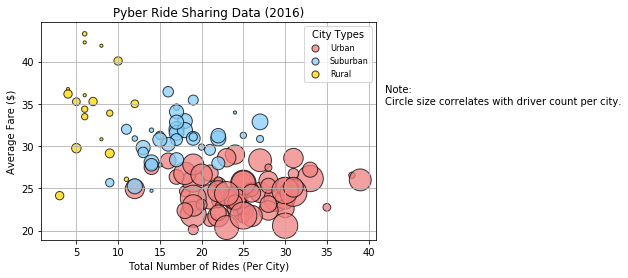

In [2]:
# Data for Settlement Types (Urban, Suburban, Rural)
# Urban Data: Average Fare, Total Number of Rides & Total Number of Drivers Per City
urban_average_fare = pyber_df[pyber_df["type"] == "Urban"].groupby("city").fare.mean()
urban_ride_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").ride_id.count()
urban_driver_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").driver_count.mean()

# Suburban Data: Average Fare, Total Number of Rides & Total Number of Drivers Per City
suburban_average_fare = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").fare.mean()
suburban_ride_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").ride_id.count()
suburban_driver_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").driver_count.mean()

# Rural Data: Average Fare, Total Number of Rides & Total Number of Drivers Per City
rural_average_fare = pyber_df[pyber_df["type"] == "Rural"].groupby("city").fare.mean()
rural_ride_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").ride_id.count()
rural_driver_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").driver_count.mean()

# Obtain the X and Y Coordinates for Each of the Three Settlement Types
# Urban X and Y Coordinates
ux_axis = urban_ride_total
uy_axis = urban_average_fare
uz_axis = urban_driver_total

# Suburban X and Y Coordinates
sx_axis = suburban_ride_total
sy_axis = suburban_average_fare
sz_axis = suburban_driver_total

# Rural X and Y Coordinates
rx_axis = rural_ride_total
ry_axis = rural_average_fare
rz_axis = rural_driver_total

# Build Scatter Plots for Each Settlement Types
urban_bubble = plt.scatter(ux_axis, uy_axis, s=uz_axis*10, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75, label="Urban")
suburban_bubble = plt.scatter(sx_axis, sy_axis, s=sz_axis*10, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75, label="Suburban")
rural_bubble = plt.scatter(rx_axis, ry_axis, s=rz_axis*10, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label="Rural")

# Incorporate Other Graph Properties
# Set Title & Labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a Legend
lgnd = plt.legend(handles=[urban_bubble, suburban_bubble, rural_bubble], title="City Types", fontsize=8, loc="best") 
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a Text Label Regarding Circle Size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("./Images/pyber_ridesharing_data_2016.png")

# Show plot
plt.show()

## Total Fares by City Type

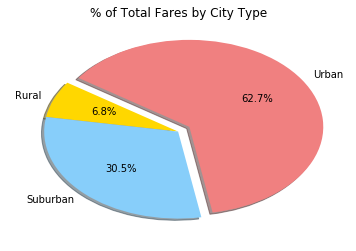

In [3]:
# Calculate Settlement Type Percentage of Total Fares & Dataset
# Sum All Fares
total_settlement_fares = pyber_df.fare.sum()

# Sum Each Settlement Type & Divide By The Sum of All Fares
urban_fare_percent = pyber_df[pyber_df["type"] == "Urban"].fare.sum() / total_settlement_fares * 100
suburban_fare_percent = pyber_df[pyber_df["type"] == "Suburban"].fare.sum() / total_settlement_fares * 100
rural_fare_percent = pyber_df[pyber_df["type"] == "Rural"].fare.sum() / total_settlement_fares * 100

# Build Pie Chart
plt.title("% of Total Fares by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [urban_fare_percent, rural_fare_percent, suburban_fare_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("./Images/pyber_ridesharing_percetage_total_fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

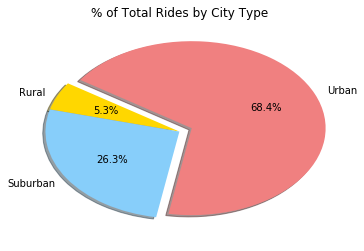

In [4]:
# Calculate Settlement Type Percentage of Total Rides & Dataset
# Count All Rides by ride_id
total_settlement_rides = pyber_df.ride_id.count()

# Counr Rides per Settlement & Divide By The Count of All Rides
urban_ride_percent = pyber_df[pyber_df["type"] == "Urban"].ride_id.count() / total_settlement_rides * 100
suburban_ride_percent = pyber_df[pyber_df["type"] == "Suburban"].ride_id.count() / total_settlement_rides * 100
rural_ride_percent = pyber_df[pyber_df["type"] == "Rural"].ride_id.count() / total_settlement_rides * 100

# Build Pie Chart
plt.title("% of Total Rides by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [urban_ride_percent, rural_ride_percent, suburban_ride_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=260)

# Save Figure
plt.savefig("./Images/pyber_ridesharing_percetage_total_rides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

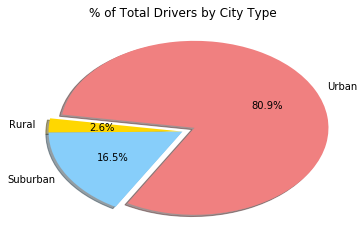

In [5]:
# Calculate Settlement Type Percentage of Total Drivers & Dataset
# Count All Drivers by driver_count
total_settlement_drivers = city_data.driver_count.sum()

# Count Drivers per Settlement & Divide By The Count of All Drivers
urban_driver_percent = city_data[city_data["type"] == "Urban"].driver_count.sum() / total_settlement_drivers * 100
suburban_driver_percent = city_data[city_data["type"] == "Suburban"].driver_count.sum() / total_settlement_drivers * 100
rural_driver_percent = city_data[city_data["type"] == "Rural"].driver_count.sum() / total_settlement_drivers * 100

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [urban_driver_percent, rural_driver_percent, suburban_driver_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=240)

# Save Figure
plt.savefig("./Images/pyber_ridesharing_percetage_total_drivers.png")

# Show Figure
plt.show()